In [1]:
import numpy as np
import scipy.signal as signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# Signs samplying rate of 2000Hz, nyq = 1000

t = np.linspace(0,1.0,2001)

sig_5Hz = np.sin(2*np.pi*5*t)
sig_50Hz = np.sin(2*np.pi*50*t)
sig_250Hz = np.sin(2*np.pi*250*t)

sig_5Hz_50Hz_250Hz = sig_5Hz + sig_50Hz + sig_250Hz

In [3]:
numtaps = 101
lpf_cutoff = 7
hpf_cutoff = 100
bp_cutoff1 = 40
bp_cutoff2 = 100

In [4]:
# Lowpass
lowpass_coef = signal.firwin(numtaps,lpf_cutoff,nyq=1000)
lpf_output = signal.convolve(sig_5Hz_50Hz_250Hz,lowpass_coef,mode='same')

In [5]:
# Highpass
highpass_coef = signal.firwin(numtaps,hpf_cutoff,pass_zero=False,nyq=1000)
hpf_output = signal.convolve(sig_5Hz_50Hz_250Hz,highpass_coef,mode='same')

In [6]:
# Bandpass
bandpass_coef = signal.firwin(numtaps,[bp_cutoff1,bp_cutoff2],pass_zero=False,nyq=1000)
bandpass_output = signal.convolve(sig_5Hz_50Hz_250Hz,bandpass_coef,mode='same')

In [7]:
style.use('dark_background')

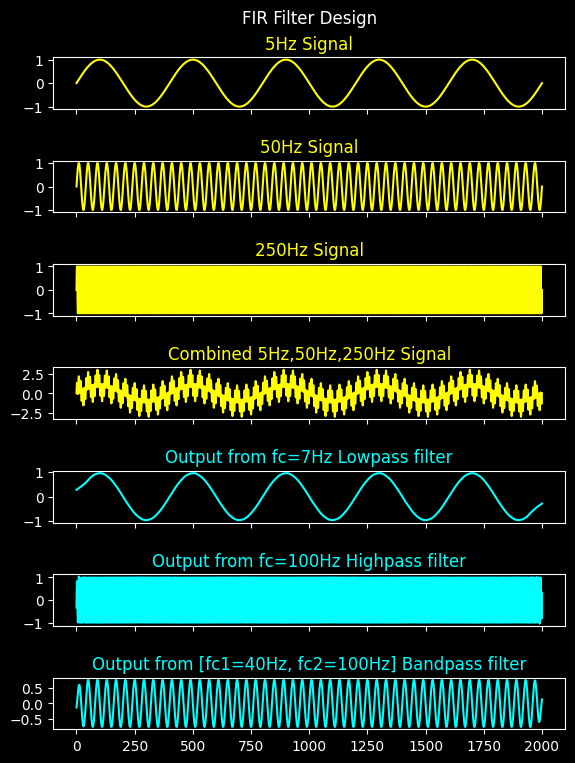

In [8]:
f, plt_arr = plt.subplots(7, sharex=True)
f.suptitle("FIR Filter Design", y=1.6)

plt_arr[0].plot(sig_5Hz, color='yellow')
plt_arr[0].set_title('5Hz Signal', color='yellow')
plt_arr[1].plot(sig_50Hz, color='yellow')
plt_arr[1].set_title('50Hz Signal', color='yellow')
plt_arr[2].plot(sig_250Hz, color='yellow')
plt_arr[2].set_title('250Hz Signal', color='yellow')
plt_arr[3].plot(sig_5Hz_50Hz_250Hz, color='yellow')
plt_arr[3].set_title('Combined 5Hz,50Hz,250Hz Signal', color='yellow')
plt_arr[4].plot(lpf_output, color='cyan')
plt_arr[4].set_title('Output from fc=7Hz Lowpass filter', color='cyan')
plt_arr[5].plot(hpf_output, color='cyan')
plt_arr[5].set_title('Output from fc=100Hz Highpass filter', color='cyan')
plt_arr[6].plot(bandpass_output, color='cyan')
plt_arr[6].set_title(
    'Output from [fc1=40Hz, fc2=100Hz] Bandpass filter', color='cyan')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=1.5, wspace=1, hspace=1)
plt.show()


In [9]:
freq_domain_sig_5Hz = fft(sig_5Hz)
freq_domain_sig_50Hz = fft(sig_50Hz)
freq_domain_sig_250Hz = fft(sig_250Hz)
freq_domain_sig_5Hz_50Hz_250Hz = fft(sig_5Hz_50Hz_250Hz)
freq_domain_lpf_output = fft(lpf_output)
freq_domain_hpf_output = fft(hpf_output)
freq_domain_bandpass_output = fft(bandpass_output)


/home/hilmy/Documents/labs/notebook/praktikum tpid/.venv/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


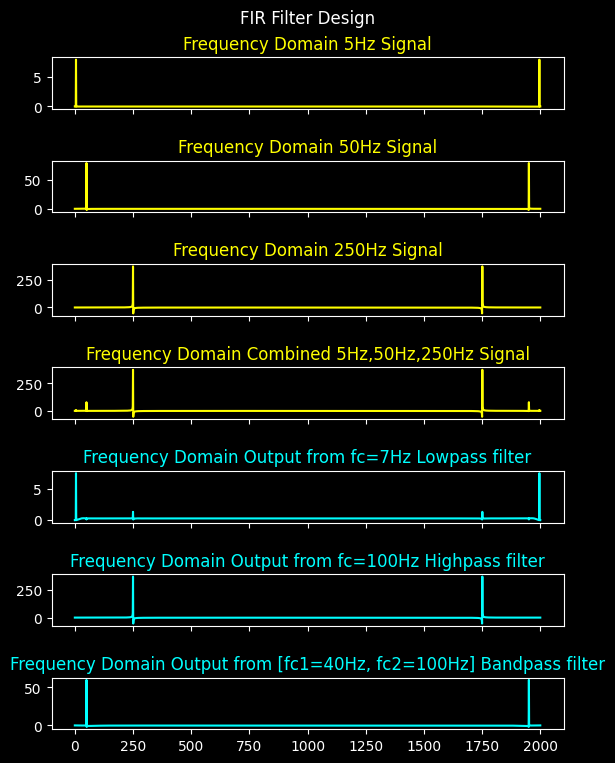

In [10]:
f, plt_arr = plt.subplots(7, sharex=True)
f.suptitle("FIR Filter Design", y=1.6)

plt_arr[0].plot(freq_domain_sig_5Hz, color='yellow')
plt_arr[0].set_title('Frequency Domain 5Hz Signal', color='yellow')
plt_arr[1].plot(freq_domain_sig_50Hz, color='yellow')
plt_arr[1].set_title('Frequency Domain 50Hz Signal', color='yellow')
plt_arr[2].plot(freq_domain_sig_250Hz, color='yellow')
plt_arr[2].set_title('Frequency Domain 250Hz Signal', color='yellow')
plt_arr[3].plot(freq_domain_sig_5Hz_50Hz_250Hz, color='yellow')
plt_arr[3].set_title(
    'Frequency Domain Combined 5Hz,50Hz,250Hz Signal', color='yellow')
plt_arr[4].plot(freq_domain_lpf_output, color='cyan')
plt_arr[4].set_title(
    'Frequency Domain Output from fc=7Hz Lowpass filter', color='cyan')
plt_arr[5].plot(freq_domain_hpf_output, color='cyan')
plt_arr[5].set_title(
    'Frequency Domain Output from fc=100Hz Highpass filter', color='cyan')
plt_arr[6].plot(freq_domain_bandpass_output, color='cyan')
plt_arr[6].set_title(
    'Frequency Domain Output from [fc1=40Hz, fc2=100Hz] Bandpass filter', color='cyan')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=1.5, wspace=1, hspace=1)
plt.show()


In [11]:
freq_domain_sig_5Hz_db = 20 * np.log10(np.abs(freq_domain_sig_5Hz))
freq_domain_sig_50Hz_db = 20 * np.log10(np.abs(freq_domain_sig_50Hz))
freq_domain_sig_250Hz_db = 20 * np.log10(np.abs(freq_domain_sig_250Hz))
freq_domain_sig_5Hz_50Hz_250Hz_db = 20 * \
    np.log10(np.abs(freq_domain_sig_5Hz_50Hz_250Hz))
freq_domain_lpf_output_db = 20 * np.log10(np.abs(freq_domain_lpf_output))
freq_domain_hpf_output_db = 20 * np.log10(np.abs(freq_domain_hpf_output))
freq_domain_bandpass_output_db = 20 * \
    np.log10(np.abs(freq_domain_bandpass_output))


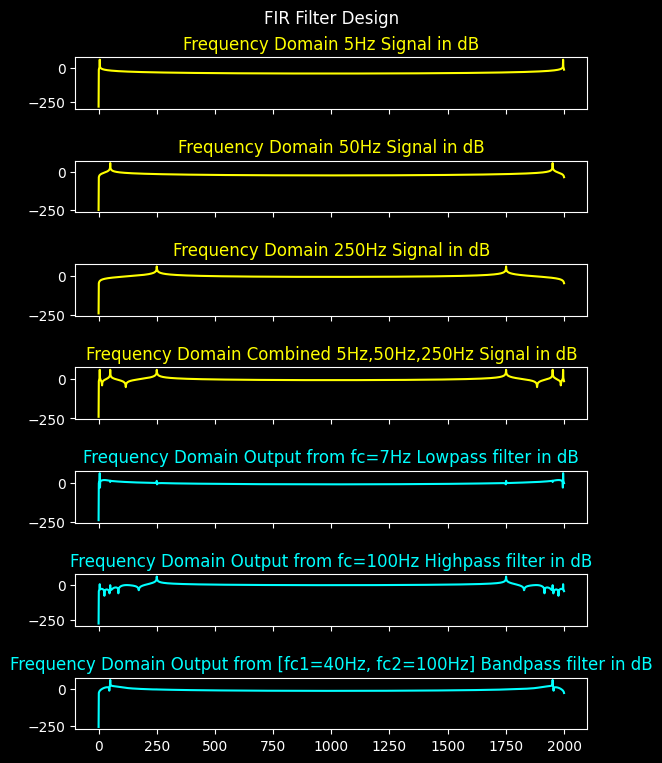

In [12]:
f, plt_arr = plt.subplots(7, sharex=True)
f.suptitle("FIR Filter Design", y=1.6)

plt_arr[0].plot(freq_domain_sig_5Hz_db, color='yellow')
plt_arr[0].set_title('Frequency Domain 5Hz Signal in dB', color='yellow')
plt_arr[1].plot(freq_domain_sig_50Hz_db, color='yellow')
plt_arr[1].set_title('Frequency Domain 50Hz Signal in dB', color='yellow')
plt_arr[2].plot(freq_domain_sig_250Hz_db, color='yellow')
plt_arr[2].set_title('Frequency Domain 250Hz Signal in dB', color='yellow')
plt_arr[3].plot(freq_domain_sig_5Hz_50Hz_250Hz_db, color='yellow')
plt_arr[3].set_title(
    'Frequency Domain Combined 5Hz,50Hz,250Hz Signal in dB', color='yellow')
plt_arr[4].plot(freq_domain_lpf_output_db, color='cyan')
plt_arr[4].set_title(
    'Frequency Domain Output from fc=7Hz Lowpass filter in dB', color='cyan')
plt_arr[5].plot(freq_domain_hpf_output_db, color='cyan')
plt_arr[5].set_title(
    'Frequency Domain Output from fc=100Hz Highpass filter in dB', color='cyan')
plt_arr[6].plot(freq_domain_bandpass_output_db, color='cyan')
plt_arr[6].set_title(
    'Frequency Domain Output from [fc1=40Hz, fc2=100Hz] Bandpass filter in dB', color='cyan')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                    top=1.5, wspace=1, hspace=1)
plt.show()
